In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15903, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15903 (delta 0), reused 1 (delta 0), pack-reused 15900 (from 1)
Receiving objects: 100% (15903/15903), 14.46 MiB | 23.39 MiB/s, done.
Resolving deltas: 100% (10703/10703), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

--2025-08-09 14:56:23--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/75388965/ba4b6380-889c-11ea-9751-f994f5961796?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-09T15%3A45%3A24Z&rscd=attachment%3B+filename%3Dyolov4.weights&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-09T14%3A44%3A45Z&ske=2025-08-09T15%3A45%3A24Z&sks=b&skv=2018-11-09&sig=EoAGC7KgPilsSFHfcGcOfmq5QMKL7J5smm6Doz6wbWo%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NDc1MTY4MywibmJmIjoxNzU0NzUxMzgzLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHV

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/dog.jpg

/bin/bash: line 1: ./darknet: No such file or directory


In [ ]:
import cv2
import matplotlib.pyplot as plt
def imShow(path):
  image = cv2.imread(path)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

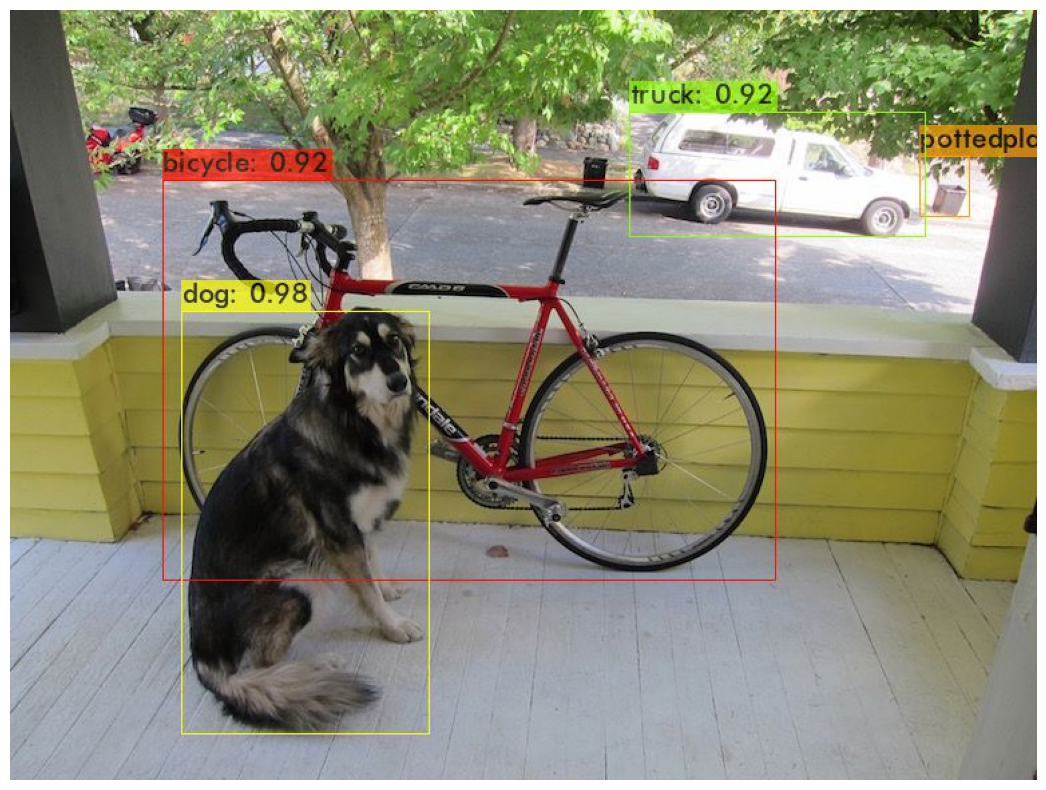

In [ ]:
imShow('predictions.jpg')

In [ ]:
#helper function to upload image
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open("data/" + name, "wb") as f:
      f.write(data)
    print('uploaded file', name)

In [ ]:
# upload an image to root directory
%cd ..
upload()

/


Saving as1.jpg to as1 (1).jpg
uploaded file as1 (1).jpg


In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/as1.jpg